<a href="https://colab.research.google.com/github/Proj-Caliber/Job-Care/blob/Choiyonje/Feature_Engineering_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/잡케어/train (5).csv')
test = pd.read_csv('/content/drive/MyDrive/잡케어/test (2).csv')

D_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_D_코드.csv', index_col = 0).T.to_dict()
H_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_H_코드.csv', index_col = 0).T.to_dict()
L_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_L_코드.csv', index_col = 0).T.to_dict()

In [ ]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


###  d_s_match_yn과 d_l_match_yn은 같을까?

In [ ]:
## d_l_match_yn의 True False의 개수는?
## d_s_match_yn의 True False의 개수는?
## h_l_match_yn의 True False의 개수는?
## h_s_match_yn의 True False의 개수는?

print('############################ d_l_match_yn #################################')
print('True :',len(train[train['d_l_match_yn'] == True]), 'False :', len(train[train['d_l_match_yn'] == False]) )

print('############################ d_s_match_yn #################################')
print('True :',len(train[train['d_s_match_yn'] == True]), 'False :', len(train[train['d_s_match_yn'] == False]) )

print('############################ h_l_match_yn #################################')
print('True :',len(train[train['h_l_match_yn'] == True]), 'False :', len(train[train['h_l_match_yn'] == False]) )

print('############################ h_s_match_yn #################################')
print('True :',len(train[train['h_s_match_yn'] == True]), 'False :', len(train[train['h_s_match_yn'] == False]) )

## 그러면 이 데이터를 어떻게 변경시켜줘야 할까?
## 거의 시작부터 많이 틀렸다? 그러면 아예 데이터를 사용하지 않는다면?? 더 높아지지 않을까??
## 잘못 기입된 데이터일까??
## 변경시키지 말고 그냥 데이터를 넣어주자.

############################ d_l_match_yn #################################
True : 315268 False : 186683
############################ d_s_match_yn #################################
True : 75257 False : 426694
############################ h_l_match_yn #################################
True : 399338 False : 102613
############################ h_s_match_yn #################################
True : 136629 False : 365322


In [ ]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 56)
(46404, 55)


## 속성 코드 이해하기 D, H, L

In [ ]:
D_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_D_코드.csv')
H_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_H_코드.csv')
L_code = pd.read_csv('/content/drive/MyDrive/잡케어/속성_L_코드.csv')

In [ ]:
print('##################### D 코드 ################################')
print('D 대분류코드 개수 :',len(D_code['속성 D 대분류코드'].unique()))
print('D 중분류코드 개수 :',len(D_code['속성 D 중분류코드'].unique()))
print('D 소분류코드 개수 :',len(D_code['속성 D 소분류코드'].unique()))
print('D 세분류코드 개수 :',len(D_code['속성 D 세분류코드'].unique()))

print('##################### H 코드 ################################')
print('H 대분류코드 개수 :',len(H_code['속성 H 대분류코드'].unique()))
print('H 중분류코드 개수 :',len(H_code['속성 H 중분류코드'].unique()))

print('##################### L 코드 ################################')
print('L 대분류코드 개수 :',len(L_code['속성 L 대분류코드'].unique()))
print('L 중분류코드 개수 :',len(L_code['속성 L 중분류코드'].unique()))
print('L 소분류코드 개수 :',len(L_code['속성 L 소분류코드'].unique()))
print('L 세분류코드 개수 :',len(L_code['속성 L 세분류코드'].unique()))

##################### D 코드 ################################
D 대분류코드 개수 : 11
D 중분류코드 개수 : 36
D 소분류코드 개수 : 137
D 세분류코드 개수 : 451
##################### H 코드 ################################
H 대분류코드 개수 : 21
H 중분류코드 개수 : 256
##################### L 코드 ################################
L 대분류코드 개수 : 22
L 중분류코드 개수 : 99
L 소분류코드 개수 : 332
L 세분류코드 개수 : 828


### D 코드

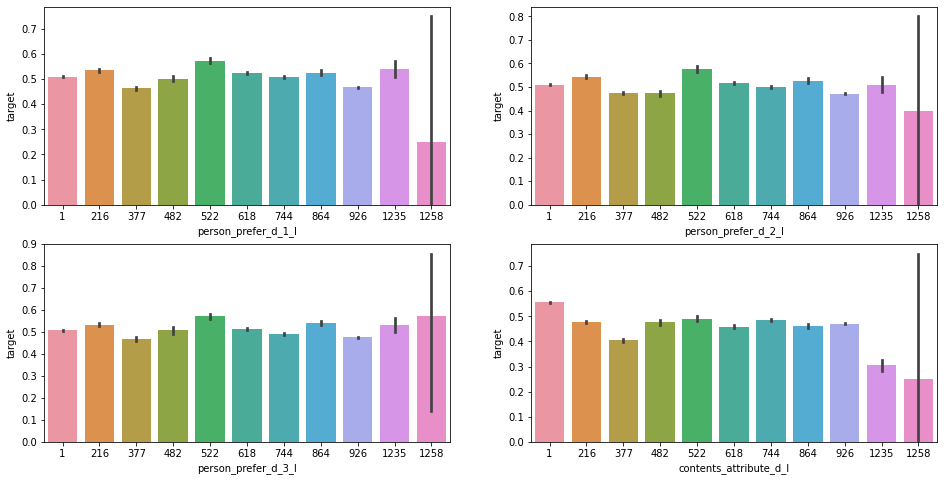

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train_data, x = 'person_prefer_d_1_l', y = 'target', ax = ax[0,0])
sns.barplot(data = train_data, x = 'person_prefer_d_2_l', y = 'target',ax = ax[0,1])
sns.barplot(data = train_data, x = 'person_prefer_d_3_l',y = 'target', ax = ax[1,0])
sns.barplot(data = train_data, x = 'contents_attribute_d_l', y = 'target',ax = ax[1,1])

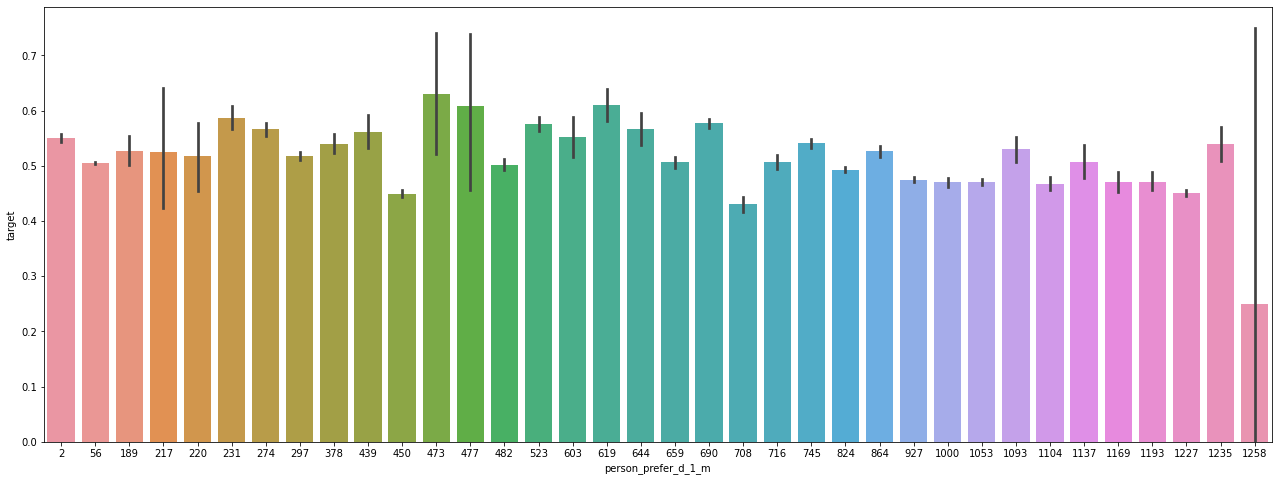

In [ ]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_1_m', y = 'target')

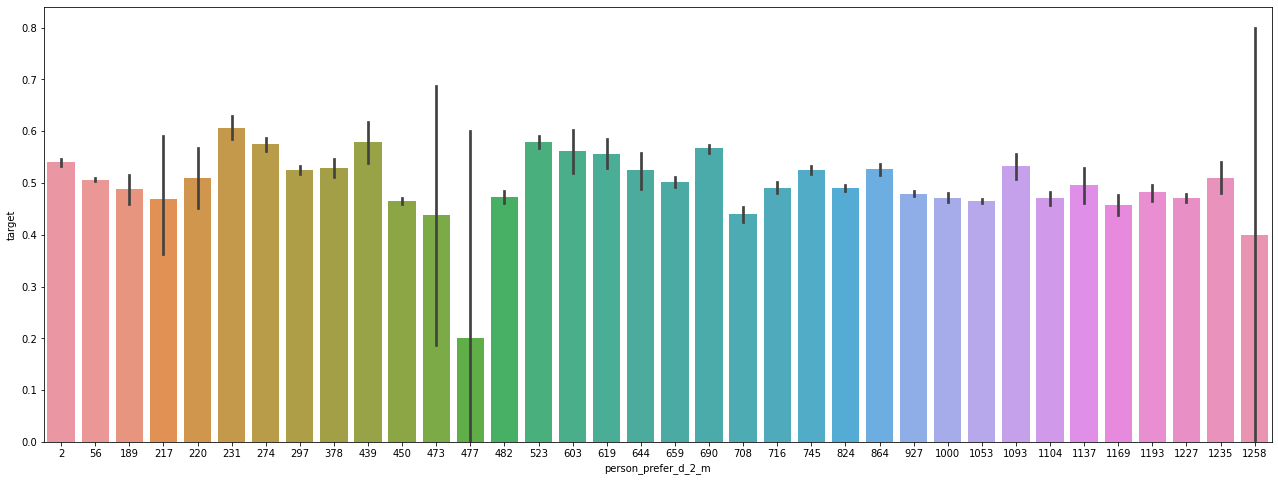

In [ ]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_2_m', y = 'target')

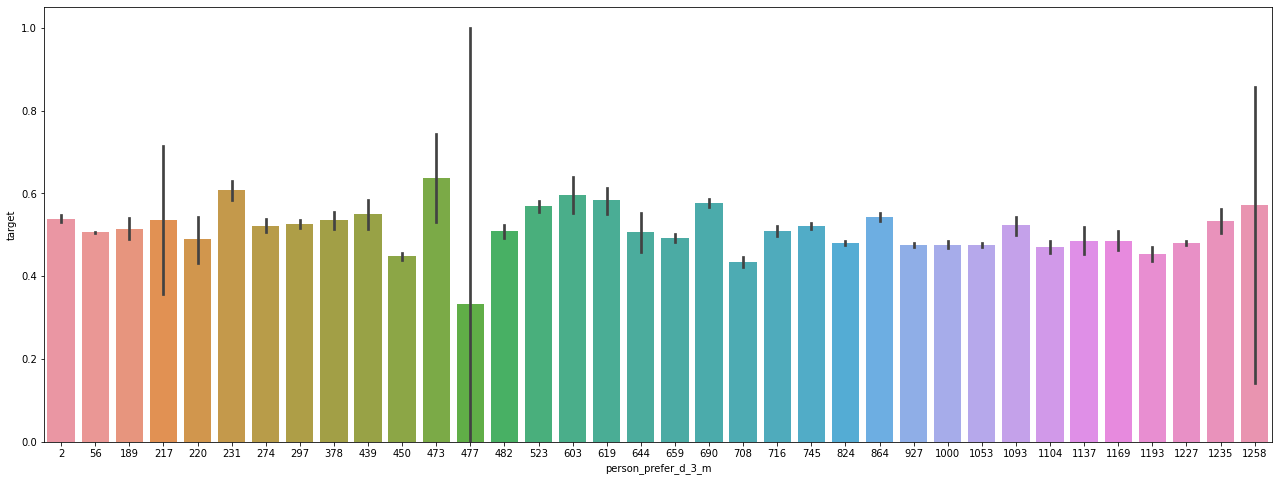

In [ ]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_3_m', y = 'target')

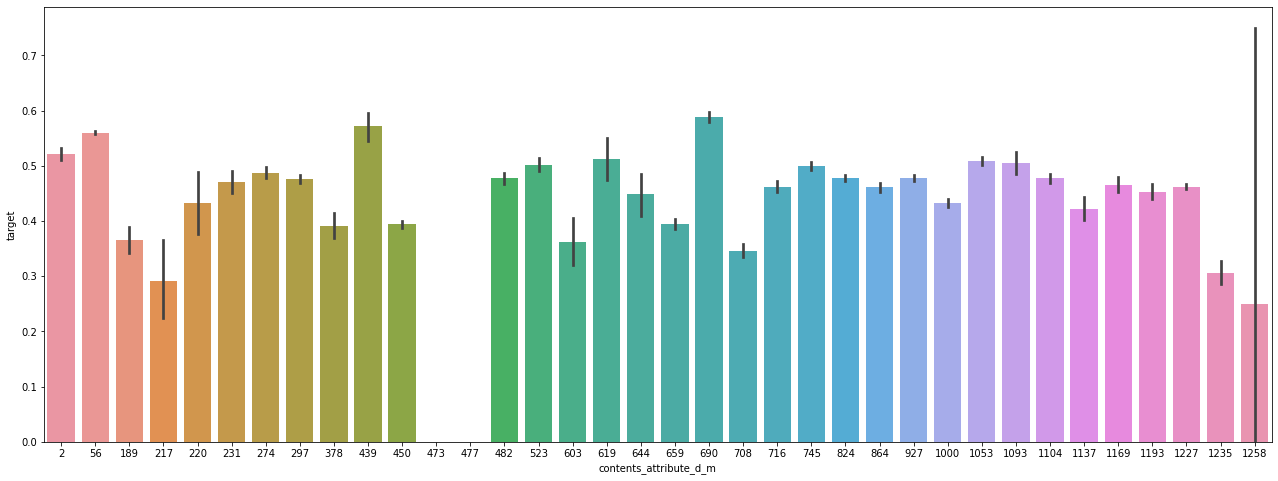

In [ ]:
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'contents_attribute_d_m', y = 'target')

In [ ]:
for i in ['person_prefer_d_1_l','person_prefer_d_2_l','person_prefer_d_3_l','contents_attribute_d_l']:
    
    print(f'##################### {i} #############################')
    for j in train_data[i].unique():
        
        print(f'##################### {j} #############################')
        print(train_data[train_data[i] == j][i[:-1] + 'm'].value_counts())

##################### person_prefer_d_1_l #############################
##################### 216 #############################
297    16673
274     6990
231     2254
220      249
217       78
Name: person_prefer_d_1_m, dtype: int64
##################### 1 #############################
56     190011
2       15914
189      1521
Name: person_prefer_d_1_m, dtype: int64
##################### 377 #############################
450    22240
378     2998
439      994
473       73
477       46
Name: person_prefer_d_1_m, dtype: int64
##################### 618 #############################
690    12148
659     8769
716     6012
708     5335
619     1138
644     1007
Name: person_prefer_d_1_m, dtype: int64
##################### 926 #############################
927     37305
1053    31260
1227    30041
1000    13481
1104     6115
1193     3696
1169     2708
1093     1881
1137     1188
Name: person_prefer_d_1_m, dtype: int64
##################### 744 #############################
824    35474
745  

### contents_open_dt

In [ ]:
# contents_open_dt를 년, 월, 일, 시간으로 나누자.
def date_time(df, columns = 'contents_open_dt'):

    df[columns] = pd.to_datetime(df[columns])
    df['year'] = df[columns].dt.year
    df['month'] = df[columns].dt.month
    df['day'] = df[columns].dt.day
    df['hour'] = df[columns].dt.hour
    df['weekday'] = df[columns].apply(lambda x: x.weekday())
    df['weekend'] = df['weekday'].copy()
    df['weekday'] = df['weekday'].apply(lambda x:1 if x>4 else 0)
    df['date'] = df[columns].dt.date

    return df

train_data = date_time(train_data)
test_data = date_time(test_data)

In [ ]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,year,month,day,hour,weekday,weekend,date
0,0,True,True,True,False,False,False,1,4,3,5,8,1,1,3,3,10,2,1,2,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,2020,1,17,12,0,4,2020-01-17
1,1,False,False,False,True,True,False,1,3,4,1,4,1,1,1,3,5,1,1,2,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,2020,6,18,17,0,3,2020-06-18
2,2,False,False,False,True,False,False,2,0,3,5,3,1,1,3,1,10,2,1,1,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,2020,7,8,20,0,2,2020-07-08
3,3,False,False,False,True,False,False,2,0,2,5,3,1,1,1,3,5,1,1,2,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,2020,1,13,18,0,0,2020-01-13
4,4,True,True,True,False,False,False,1,3,4,5,4,1,1,1,1,10,2,1,2,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,2020,3,9,20,0,0,2020-03-09


Text(0.5, 1.0, 'Countplot of year by test')

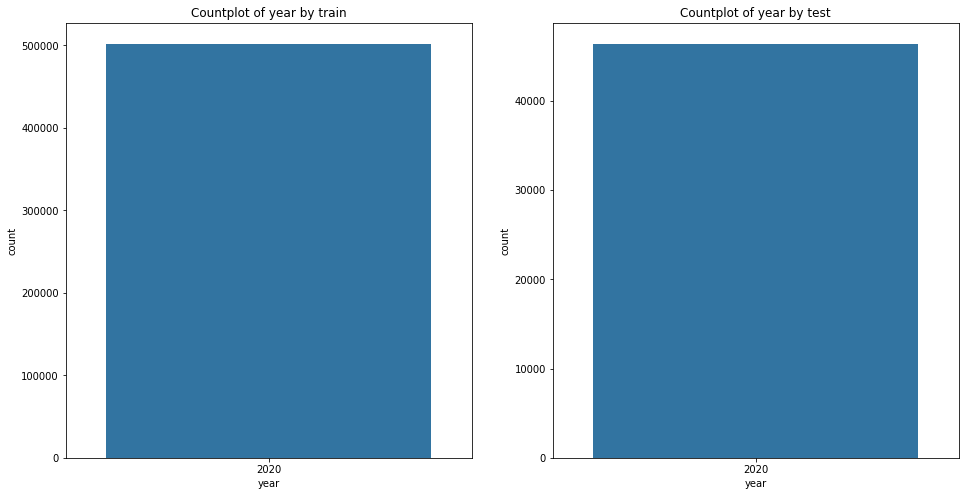

In [ ]:
## year 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['year'], ax = ax[0])
sns.countplot(test_data['year'], ax = ax[1])

ax[0].set_title('Countplot of year by train')
ax[1].set_title('Countplot of year by test')

Text(0.5, 1.0, 'Countplot of month by test')

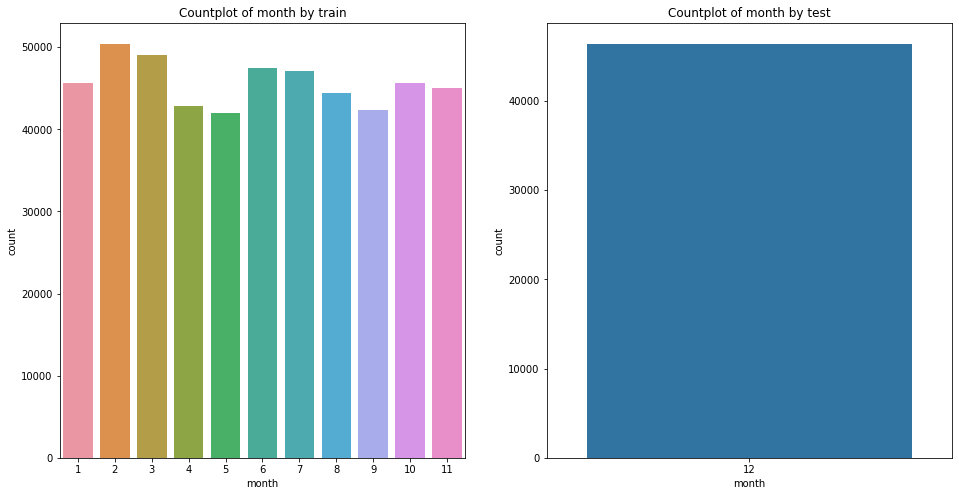

In [ ]:
## month 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['month'], ax = ax[0])
sns.countplot(test_data['month'], ax = ax[1])

ax[0].set_title('Countplot of month by train')
ax[1].set_title('Countplot of month by test')

# train 데이터는 1월부터 11월까지지만 test데이터는 12월의 데이터만 가지고 있다.
# 더미화를 사용할 수 없을 것이라 판단된다.

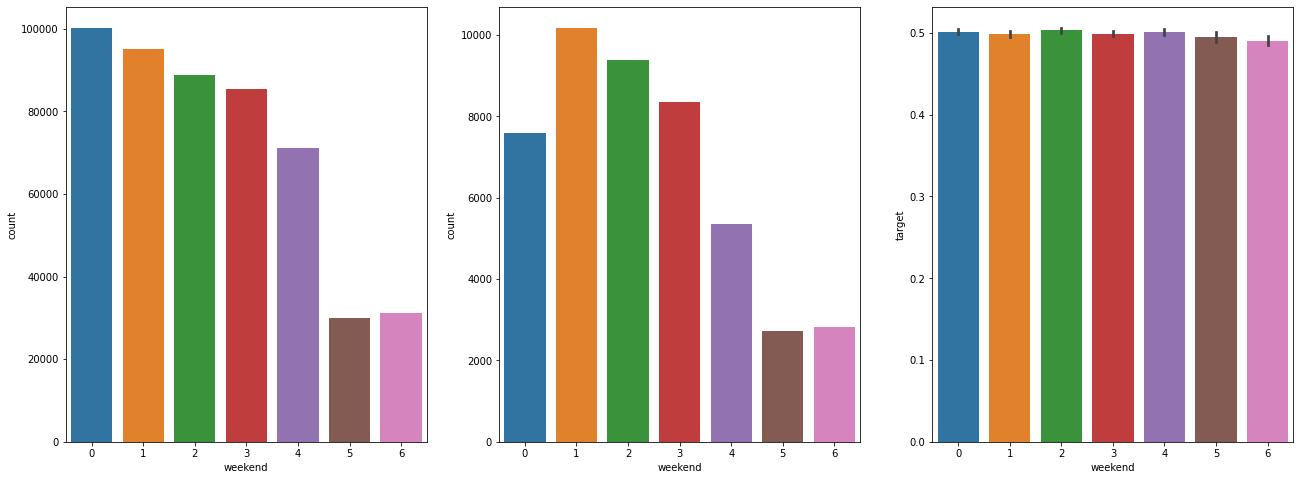

In [ ]:
## weekend로 살펴보자.
fig, ax = plt.subplots(ncols = 3, figsize = (22,8))
sns.countplot(train_data['weekend'], ax = ax[0])
sns.countplot(test_data['weekend'], ax= ax[1])
sns.barplot(data = train_data, x = 'weekend', y = 'target', ax = ax[2])

## 다른 부분이 여기서도 발견이 된다.~

Text(0.5, 1.0, 'Countplot of hour by test')

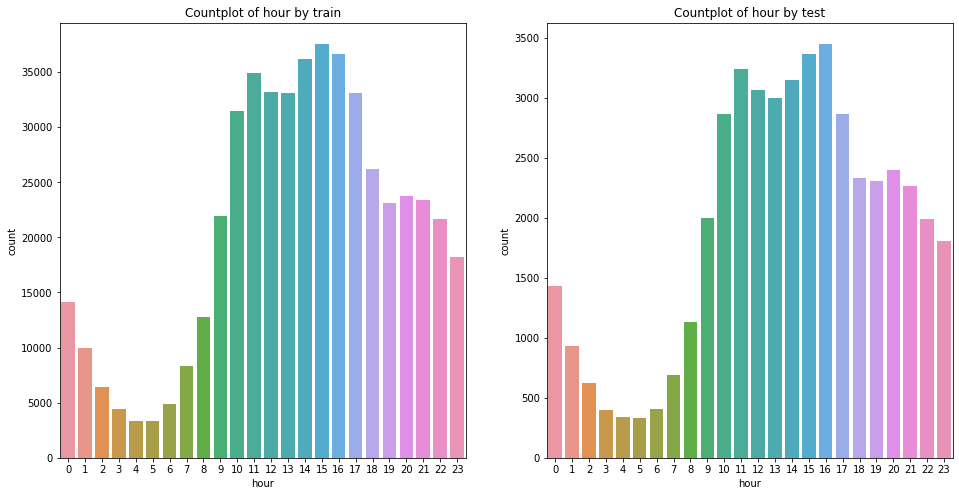

In [ ]:
## hour 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['hour'], ax = ax[0])
sns.countplot(test_data['hour'], ax = ax[1])

ax[0].set_title('Countplot of hour by train')
ax[1].set_title('Countplot of hour by test')

## train과 test의 데이터가 비슷한 분포를 가지고 있다는 것을 알 수 있다.

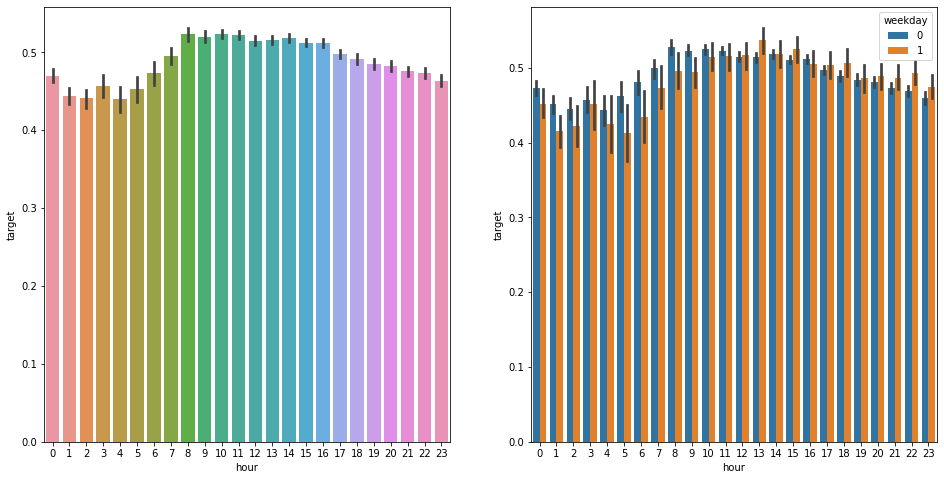

In [ ]:
## train의 hour를 target값과 비교해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', ax = ax[0])
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday', ax = ax[1])

# 재밌는 현상으로 12시 넘어가서는 평일보다 주말에 더 많은 사람이 이용한다.

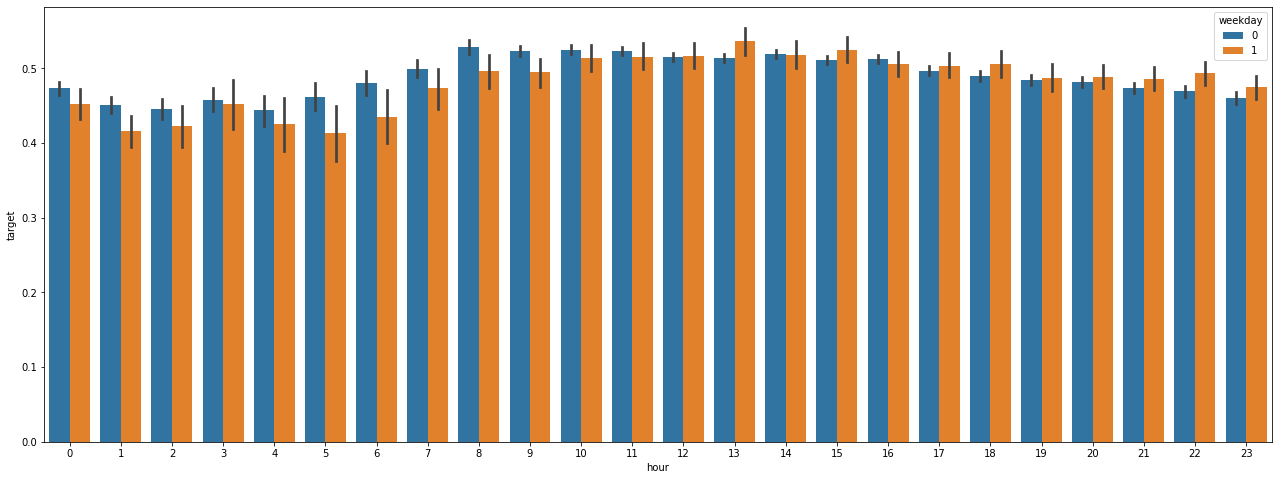

In [ ]:
## 더 자세히 살펴보도록 하자.
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday')

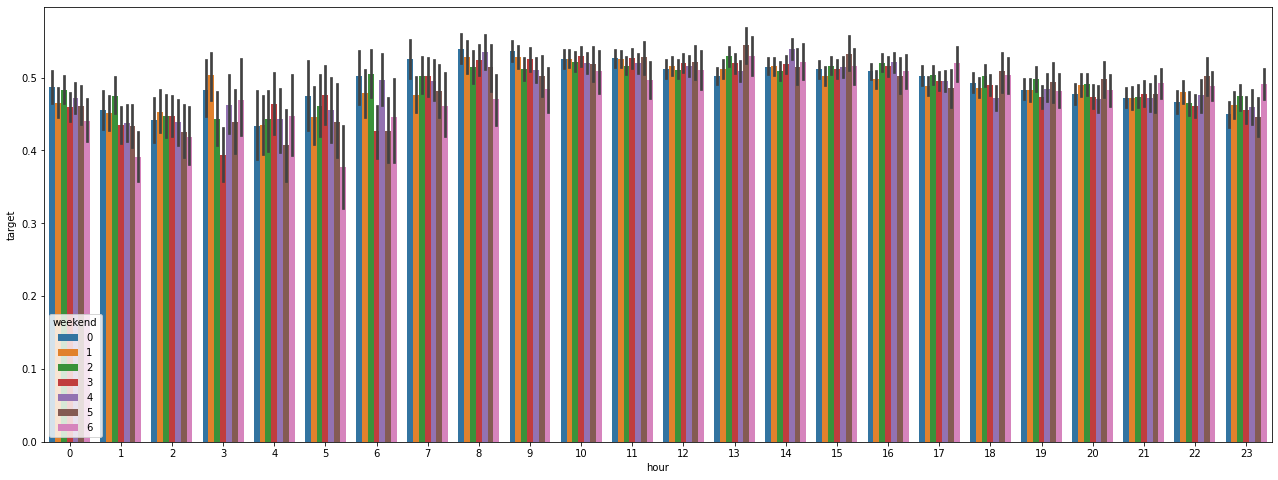

In [ ]:
# 시간을 요일별로 확인해 보자.
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekend')

Text(0.5, 1.0, 'weekday of target by train')

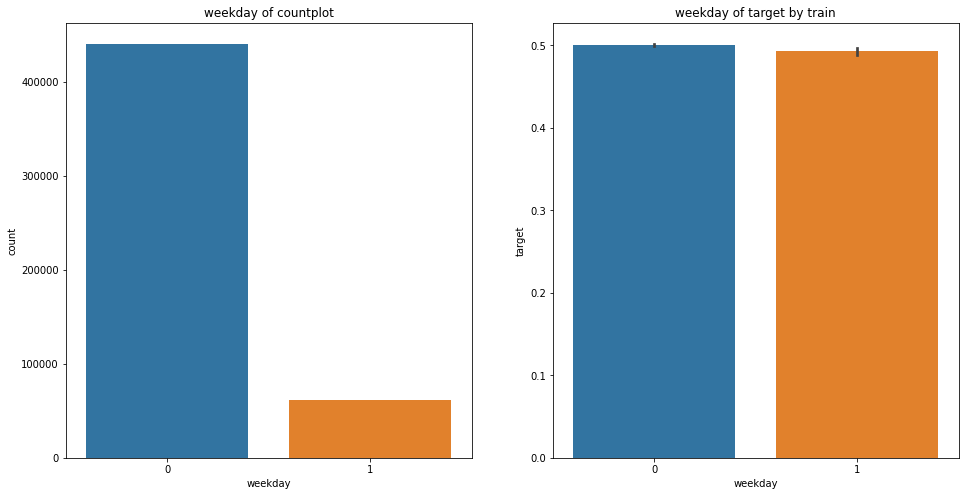

In [ ]:
# 평일과 주말을 target과 비교해보자.
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.countplot(train_data['weekday'], ax = ax[0])
sns.barplot(data = train_data, x = 'weekday', y = 'target', ax = ax[1])

ax[0].set_title('weekday of countplot')
ax[1].set_title('weekday of target by train')
# 평일과 주말의 차이가 크지 않다고 생각한다.

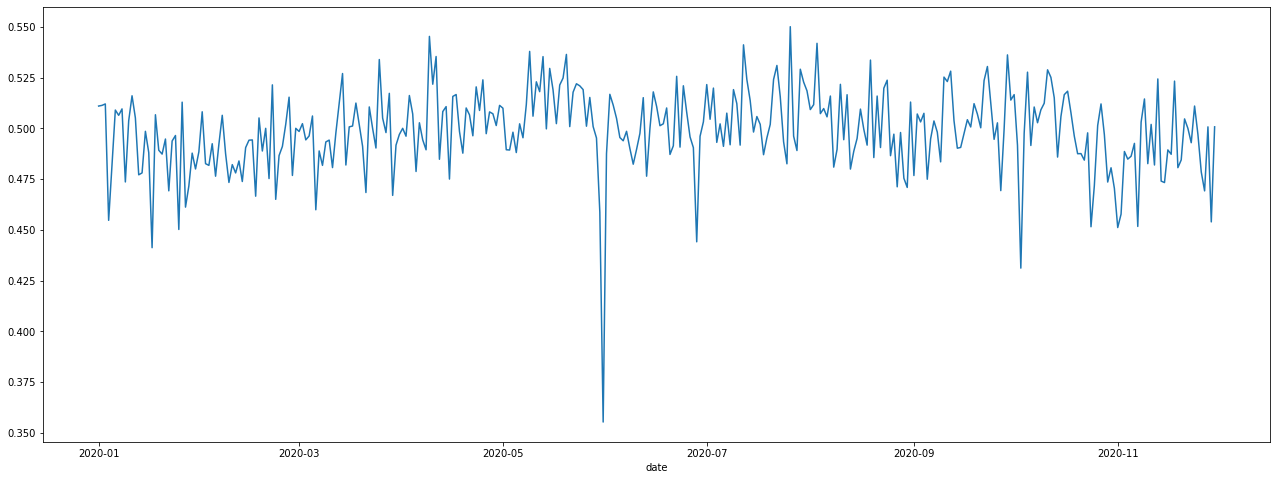

In [ ]:
## date를 이용하여 점점 늘어나는지 확인해보자.
plot_data = train_data.groupby('date')['target'].mean()
plot_data
plt.figure(figsize = (22,8))
sns.lineplot(data = plot_data, x = plot_data.index, y = plot_data.values)

## 2020.05.31을 줄이니 더 좋은 성과를 낸다.

In [ ]:
## 우리가 확인해봐야할 것
## 평일에 공휴일인 곳을 바꿔줘야 한다.
## 왜 저 날은 내려갔을까?
## 중복 제거를 해야할 것 같은데 그 부분도 한번 계속 확인해보자.

In [ ]:
for i in plot_data.index:
    if plot_data[i] < 0.4:
        print(i)

## 왜 이 날짜만 적게 나타났을까?
# train_data[train_data['date'] == datetime.date(2020, 5, 31)]

delete_index = train_data[train_data['date'] == datetime.date(2020, 5, 31)].index

train_data = train_data.drop(delete_index, axis = 0)

train_data = train_data.reset_index(drop = True)

2020-05-31


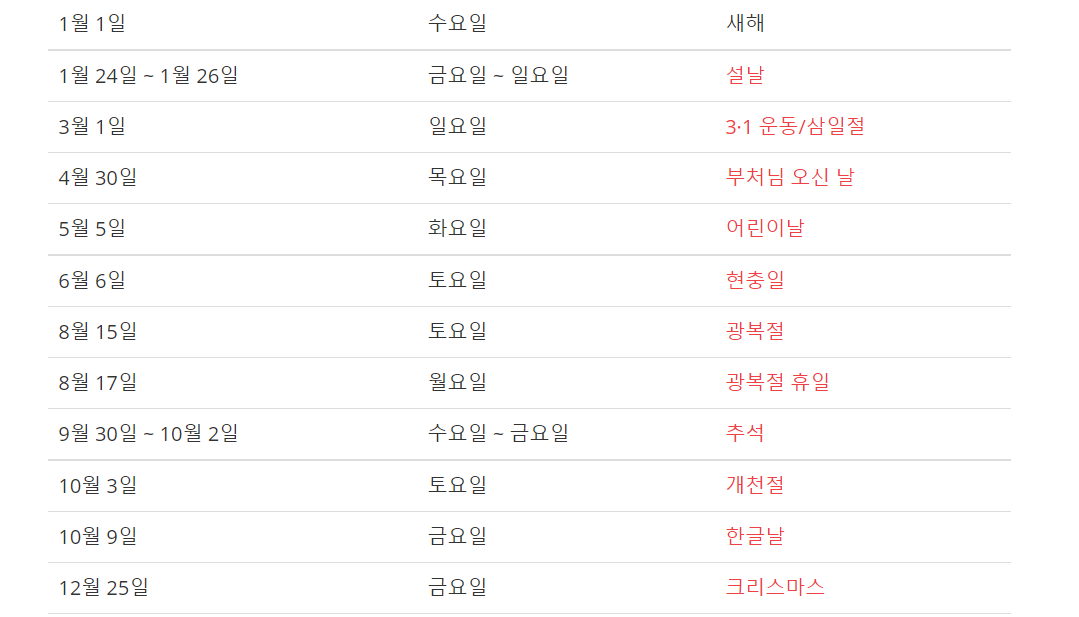

In [ ]:
## 평일인데 공휴일인 부분은 주말로 변경해주자.
train_data['date'] = train_data['date'].apply(lambda x:str(x))

change_date = ['2020-01-01', '2020-01-24', '2020-04-30','2020-05-05','2020-08-17', '2020-09-30','2020-10-01','2020-10-02','2020-10-09','2020-12-25']

for i in train_data.index:
    if train_data.loc[i, 'date'] in change_date:

        train_data.loc[i,'weekday'] = 1
        train_data.loc[i,'weekend'] = 6

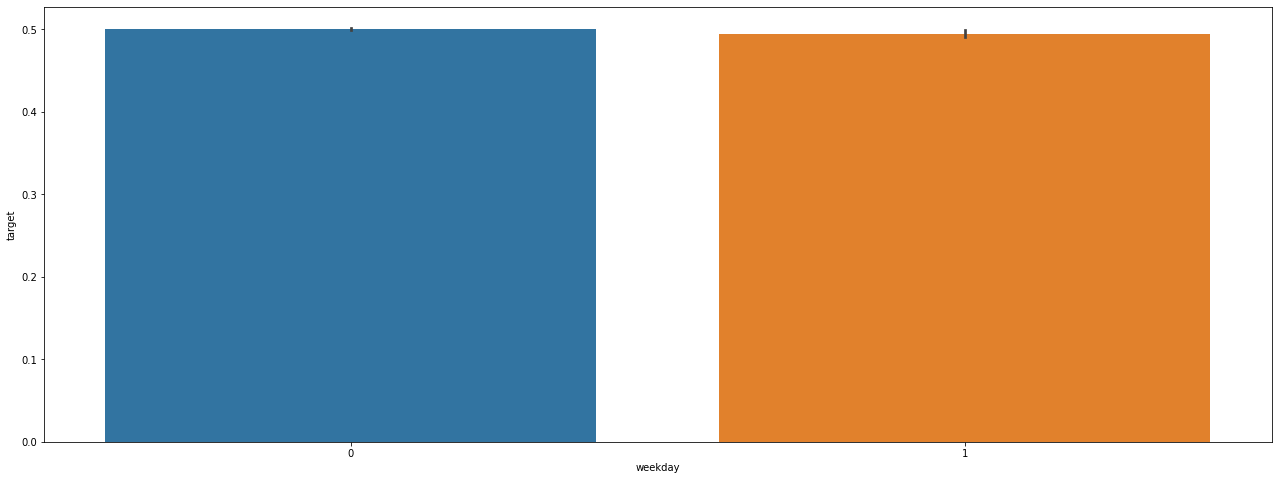

In [ ]:
# ??? 영향이 없나...? ㅎㅎ
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'weekday', y = 'target')

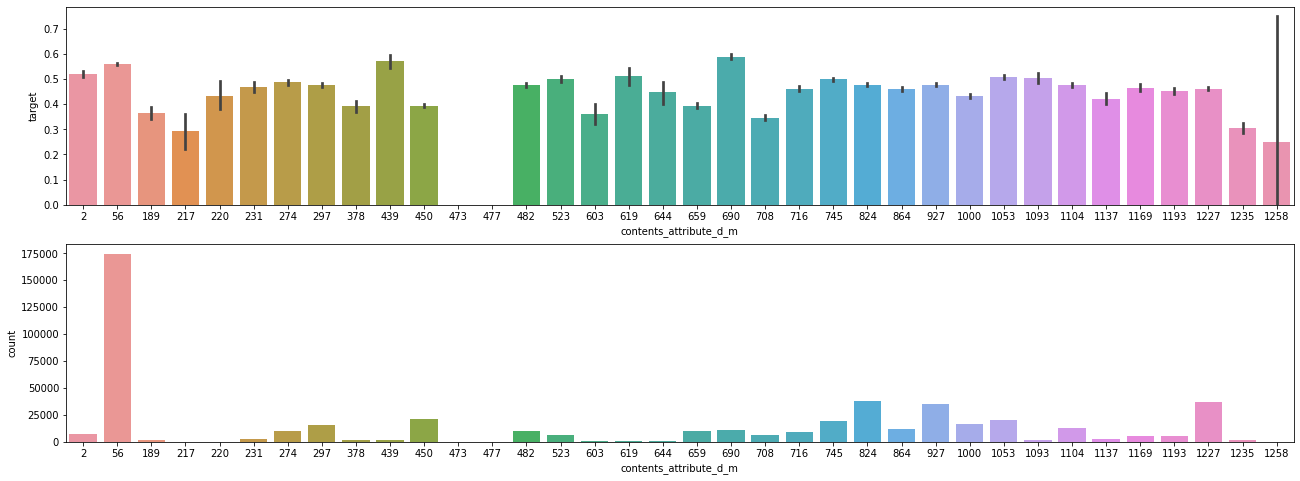

In [ ]:
fig, ax = plt.subplots(nrows = 2,figsize = (22,8))
sns.barplot(data = train_data, x = 'contents_attribute_d_m', y = 'target', ax = ax[0])
sns.countplot(train_data['contents_attribute_d_m'], ax = ax[1])

### D,H,L 데이터 target 평균값으로 mapping 해주기

In [ ]:
## groupby 해야하는 것 전부!!!
def D_H_L_mapping(train = None, test = None):
    
    ## D_1_code
    person_prefer_d_1_l = train.groupby('person_prefer_d_1_l')['target'].mean()
    train['person_prefer_d_1_l'] = train['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})
    test['person_prefer_d_1_l'] = test['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})

    person_prefer_d_1_n = train.groupby('person_prefer_d_1_n')['target'].mean()
    train['person_prefer_d_1_n'] = train['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})
    test['person_prefer_d_1_n'] = test['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})


    person_prefer_d_1_m = train.groupby('person_prefer_d_1_m')['target'].mean()
    train['person_prefer_d_1_m'] = train['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    test['person_prefer_d_1_m'] = test['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    
    person_prefer_d_1_s = train.groupby('person_prefer_d_1_s')['target'].mean()
    train['person_prefer_d_1_s'] = train['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})
    test['person_prefer_d_1_s'] = test['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})

    ## D_2_code
    person_prefer_d_2_l = train.groupby('person_prefer_d_2_l')['target'].mean()
    train['person_prefer_d_2_l'] = train['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})
    test['person_prefer_d_2_l'] = test['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})

    person_prefer_d_2_n = train.groupby('person_prefer_d_2_n')['target'].mean()
    train['person_prefer_d_2_n'] = train['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    test['person_prefer_d_2_n'] = test['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    
    person_prefer_d_2_m = train.groupby('person_prefer_d_2_m')['target'].mean()
    train['person_prefer_d_2_m'] = train['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})
    test['person_prefer_d_2_m'] = test['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})

    person_prefer_d_2_s = train.groupby('person_prefer_d_2_s')['target'].mean()
    train['person_prefer_d_2_s'] = train['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})
    test['person_prefer_d_2_s'] = test['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})

    ## D_3_code
    person_prefer_d_3_l = train.groupby('person_prefer_d_3_l')['target'].mean()
    train['person_prefer_d_3_l'] = train['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})
    test['person_prefer_d_3_l'] = test['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})

    person_prefer_d_3_n = train.groupby('person_prefer_d_3_n')['target'].mean()
    train['person_prefer_d_3_n'] = train['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    test['person_prefer_d_3_n'] = test['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    
    person_prefer_d_3_m = train.groupby('person_prefer_d_3_m')['target'].mean()
    train['person_prefer_d_3_m'] = train['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})
    test['person_prefer_d_3_m'] = test['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})

    person_prefer_d_3_s = train.groupby('person_prefer_d_3_s')['target'].mean()
    train['person_prefer_d_3_s'] = train['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    test['person_prefer_d_3_s'] = test['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    
    ## contents_d
    contents_attribute_d_l = train.groupby('contents_attribute_d_l')['target'].mean()
    train['contents_attribute_d_l'] = train['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})
    test['contents_attribute_d_l'] = test['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})

    contents_attribute_d_m = train.groupby('contents_attribute_d_m')['target'].mean()
    train['contents_attribute_d_m'] = train['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})
    test['contents_attribute_d_m'] = test['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})

    contents_attribute_d_n = train.groupby('contents_attribute_d_n')['target'].mean()
    train['contents_attribute_d_n'] = train['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})
    test['contents_attribute_d_n'] = test['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})

    contents_attribute_d_s = train.groupby('contents_attribute_d_s')['target'].mean()
    train['contents_attribute_d_s'] = train['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})
    test['contents_attribute_d_s'] = test['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})

    ## H_1_code
    person_prefer_h_1_l = train.groupby('person_prefer_h_1_l')['target'].mean()
    train['person_prefer_h_1_l'] = train['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    test['person_prefer_h_1_l'] = test['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    
    person_prefer_h_1_m = train.groupby('person_prefer_h_1_m')['target'].mean()
    train['person_prefer_h_1_m'] = train['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})
    test['person_prefer_h_1_m'] = test['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})

    ## H_2_code
    person_prefer_h_2_l = train.groupby('person_prefer_h_2_l')['target'].mean()
    train['person_prefer_h_2_l'] = train['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})
    test['person_prefer_h_2_l'] = test['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})

    person_prefer_h_2_m = train.groupby('person_prefer_h_2_m')['target'].mean()
    train['person_prefer_h_2_m'] = train['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})
    test['person_prefer_h_2_m'] = test['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})

    ## H_3_code
    person_prefer_h_3_l = train.groupby('person_prefer_h_3_l')['target'].mean()
    train['person_prefer_h_3_l'] = train['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})
    test['person_prefer_h_3_l'] = test['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})

    person_prefer_h_3_m = train.groupby('person_prefer_h_3_m')['target'].mean()
    train['person_prefer_h_3_m'] = train['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})
    test['person_prefer_h_3_m'] = test['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})

    ## contents_H
    contents_attribute_h_l = train.groupby('contents_attribute_h_l')['target'].mean()
    train['contents_attribute_h_l'] = train['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})
    test['contents_attribute_h_l'] = test['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})

    contents_attribute_h_m = train.groupby('contents_attribute_h_m')['target'].mean()
    train['contents_attribute_h_m'] = train['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})
    test['contents_attribute_h_m'] = test['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})

    ## L_code
    contents_attribute_l_n = train.groupby('contents_attribute_l_n')['target'].mean()
    train['contents_attribute_l_n'] = train['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    test['contents_attribute_l_n'] = test['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    
    contents_attribute_l_s = train.groupby('contents_attribute_l_s')['target'].mean()
    train['contents_attribute_l_s'] = train['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})
    test['contents_attribute_l_s'] = test['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})

    contents_attribute_l_m = train.groupby('contents_attribute_l_m')['target'].mean()
    train['contents_attribute_l_m'] = train['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})
    test['contents_attribute_l_m'] = test['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})

    contents_attribute_l_l = train.groupby('contents_attribute_l_l')['target'].mean()
    train['contents_attribute_l_l'] = train['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})
    test['contents_attribute_l_l'] = test['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})

    return train, test

In [ ]:
train_data, test_data = D_H_L_mapping(train = train_data, test = test_data)

In [ ]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_d',
       'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h',
       'person_rn', 'contents_rn', 'target', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attri

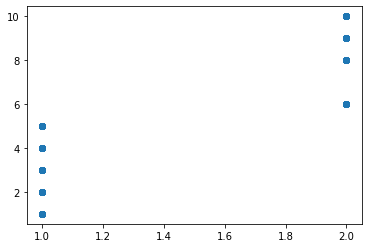

In [ ]:
plt.scatter(data= train_data, x= 'contents_attribute_j', y='contents_attribute_j_1')

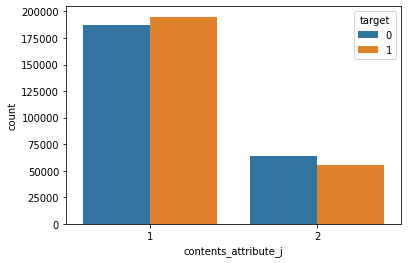

In [ ]:
sns.countplot(data= train_data, x= 'contents_attribute_j', hue= 'target')

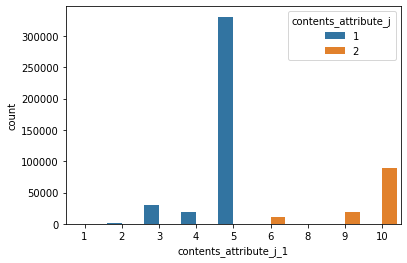

In [ ]:
sns.countplot(data= train_data, x= 'contents_attribute_j_1', hue='contents_attribute_j')
#j는 필요 없어 보임. j_1만으로도 가능

### True False 되어있는 부분 대분류만 처리해주기

In [ ]:
## 이 방법을 사용하려고 했지만 데이터를 살펴본 결과 시작 데이터부터 이상이 생겨서 안하도록 하자.
# from tqdm import tqdm
# def True_False_change(data = None, columns = None, match = None):
#     for i in tqdm(data.index):
#         if data.loc[i,match] == False:
#             for j in columns:
#                 data.loc[i,j] = 99999
#     return data

# # 이 부분은 나중에 한번 더 추가하여 모델 돌려보기~
# train_data = True_False_change(data = train_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# train_data = True_False_change(data = train_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')


# test_data = True_False_change(data = test_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# test_data = True_False_change(data = test_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')

### E데이터 살펴보기

In [ ]:
## 아무 연관이 없다.
# for i in train_data['person_prefer_e'].unique():
#     plt.figure(figsize = (22,8))
#     sns.barplot(data = train_data[train_data['person_prefer_e'] == i], x = 'contents_attribute_e', y = 'target')
#     plt.title(f'person_prefer_e : {i}')
#     plt.show()

## Modeling

In [ ]:
## 1. weekend에서 train과 test에 차이가 있다고 판단함 -->> weekend를 변수로 추가해보자.
## 2. hour의 차이가 없다면? -->  제거해보고 모델 확인해 보기

------

In [ ]:
## Github에 보면 person_attribute_a와 person_attribute_a_1의 값을 비교해 봤을 때 두 개의 변수가 다 필요하다고 생각된다.
## 변수를 추출하며 확인해 보자.
# dummy_column = ['weekend','person_attribute_a_1', 'person_attribute_b','person_prefer_c','person_prefer_e','contents_attribute_j_1','contents_attribute_c','contents_attribute_m','contents_attribute_e']
dummy_column = ['person_attribute_a_1', 'person_attribute_b','person_prefer_c','person_prefer_e','contents_attribute_j_1','contents_attribute_c','contents_attribute_m','contents_attribute_e']
drop_column = ['id','person_rn','contents_rn','year','month','day','weekday','hour','date','contents_attribute_j','person_prefer_f','person_prefer_g','d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn','contents_attribute_d','contents_attribute_h']

final_train = train_data.drop(drop_column, axis = 1)
final_test = test_data.drop(drop_column, axis = 1)

############### 만약에 중분류를 사용한다면? ##########################
# print(final_train.shape, final_test.shape)
# final_concat = pd.concat([final_train, final_test], axis = 0)
# final_data = pd.get_dummies(data = final_concat, columns = dummy_column)

# final_train = final_data.iloc[:501951,:]
# final_test = final_data.iloc[501951:,:].drop('target', axis = 1)

# print(final_train.shape, final_test.shape)
######################################################################

# # # train에만 존재하는 변수가 있기 때문에
final_train = pd.get_dummies(data = final_train, columns = dummy_column, drop_first = True)
final_test = pd.get_dummies(data = final_test, columns = dummy_column, drop_first = True)

# cyclic Encoding

In [ ]:
#cyclic Encoding 추가 > weekend
def cyclic_feat(df,col):
  df[col+'_sin']= np.sin((2*np.pi*df[col])/max(df[col]))
  df[col+'_cos']= np.cos((2*np.pi*df[col])/max(df[col]))
  df.drop(col, axis=1,inplace=True)

cyclic_feat(final_train, 'weekend')
cyclic_feat(final_test, 'weekend')

In [ ]:
print('train_data shape :', final_train.shape)
print('test_data shape :', final_test.shape)

train_data shape : (501374, 88)
test_data shape : (46404, 87)


In [ ]:
for i in set(final_train.columns):
    if i in final_test.columns:
        pass
    else:
        print(i)

target


In [ ]:
final_train.columns

Index(['person_attribute_a', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_k', 'target', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'person_attribute_a_1_1',
       'person_attribute_a_1_2', 'person_attribute_a_1_3',
       'person_attribute_a_1_4', 'person_attri

In [ ]:
# # # 중요 변수를 추출하기 위해서 statsmodels로 변수들의 P-value를 확인한다.
# import statsmodels.api as sm

# X = sm.add_constant(final_train.drop('target', axis = 1))
# y = final_train['target']

# model = sm.OLS(y,X)
# results = model.fit()
# print(results.summary())

In [ ]:
## 나중에 P-value를 통해서 변수 제거를 시도해 보자.
import statsmodels.api as sm
X = sm.add_constant(final_train.drop('target', axis = 1))
model = sm.Logit(final_train['target'], X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.667165
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               501374
Model:                          Logit   Df Residuals:                   501286
Method:                           MLE   Df Model:                           87
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                 0.03748
Time:                        10:17:06   Log-Likelihood:            -3.3450e+05
converged:                       True   LL-Null:                   -3.4753e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.8713      0.359    -16.333      0.000      -6.

# contents_attribute_i

In [ ]:
final_train.drop('contents_attribute_i',axis=1,inplace=True)
final_test.drop('contents_attribute_i',axis=1, inplace=True)

In [ ]:
!pip install catboost
!pip install vecstack

     |████████████████████████████████| 76.1 MB 84 kB/s 
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=7ec59b7658526aad72e01b1880918bb9bf796845c73e130330a4cefd870189b6
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
print(final_train.shape, final_test.shape)

(501374, 87) (46404, 86)


In [ ]:
print(final_train.isnull().sum().sum(), final_test.isnull().sum().sum())

0 12


In [ ]:
## train에는 없지만 test데이터에 있는 변수는 아예 발견할 수 없는 변수이기 때문에 0.5로 변경한다.
## 그러나 threshold가 0.4 이기 때문에 나중에 변경하도록 한다.
for columns, null_value in zip(final_test.isnull().sum().keys(), final_test.isnull().sum().values):

    if null_value > 0:

        final_test[columns] = final_test[columns].fillna(final_train[columns].mean())
        
        print(columns)
        print('Done')

print(final_test.isnull().sum().sum())

person_prefer_d_2_n
Done
person_prefer_d_3_n
Done
contents_attribute_d_n
Done
contents_attribute_l_n
Done
0


In [ ]:
final_train.columns

Index(['person_attribute_a', 'contents_attribute_a', 'contents_attribute_k',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'person_attribute_a_1_1',
       'person_attribute_a_1_2', 'person_attribute_a_1_3',
       'person_attribute_a_1_4', 'person_attribute_a_1_5',
       'per

### stacking

In [ ]:
## 추가적으로 진행할 내용
# huber regression
# extra regression

## Stacking을 사용해보자
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from vecstack import stacking
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression, HuberRegressor
from sklearn.metrics import f1_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

def f1_score_predict(y, y_pred):
    return f1_score(y, y_pred, pos_label = 1)

## regression으로 문제를 푼다면?
lgb = LGBMRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42, verbose = False)
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
hb = HuberRegressor()
etr= ExtraTreesRegressor(random_state=42)

meta_model = LogisticRegression()
models = [lgb, xgb, cat, rfg, ridge,gb, hb, etr]

# # # ## classifier로 문제를 푼다면
# # lgb = LGBMClassifier(random_state= 42)
# # xgb = XGBClassifier(random_state= 42, tree_method = 'gpu_hist')
# # cat = CatBoostClassifier(random_state = 42,task_type = 'GPU', eval_metric= "F1")
# # rfg = RandomForestClassifier(random_state = 42)
# # ridge = RidgeClassifier(random_state = 42)
# # models = [lgb, xgb, cat, rfg, ridge]
# # lr = LogisticRegression()

S_train, S_test = stacking(models, final_train.drop('target', axis = 1), final_train['target'], final_test, regression = True, mode = 'oof_pred_bag', metric = rmse, n_folds = 3, stratified=True, shuffle = True)


meta_model.fit(S_train, final_train['target'])
prediction = pd.Series(i[1] for i in meta_model.predict_proba(S_test)).apply(lambda x:1 if x>0.35 else 0)

# # print(prediction)

[10:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
a = []
b = []
for i in prediction:

    if i == 0:
        a.append(i)
    else:
        b.append(i)

In [ ]:
print(len(a), len(b))

8708 37696


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/잡케어/sample_submission.csv')

submission['target'] = prediction

submission.to_csv('/content/drive/MyDrive/잡케어/sample_submission220126_1.csv', index = False)

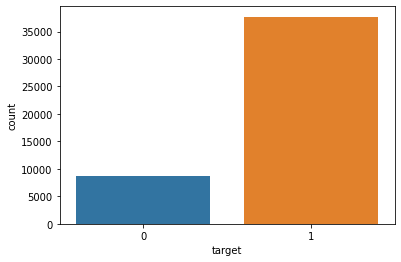

In [ ]:
sns.countplot(submission.target)

In [ ]:
submission

### voting(stacking에 비해서 많이 부족하다)

In [ ]:
# from sklearn.ensemble import VotingRegressor
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
# from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression

# def rmse(y, y_pred):
#   return np.sqrt(mean_squared_error(y, y_pred))

# lr = LinearRegression()
# lgb = LGBMRegressor(random_state = 42)
# cat = CatBoostRegressor(random_state = 42,verbose = False, task_type = 'GPU')
# xgb = XGBRegressor(random_state = 42,tree_method = 'gpu_hist')
# rfg = RandomForestRegressor(random_state = 42)
# gb = GradientBoostingRegressor(random_state = 42)


# vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('rfg',rfg),('gb',gb)])
# vo_reg.fit(final_train.drop('target', axis = 1), final_train['target'])
# prediction = vo_reg.predict(final_test)
# prediction = np.where(prediction >= 0.4, 1, 0)

In [ ]:
# a = []
# b = []
# for i in prediction:

#     if i == 0:
#         a.append(i)
#     else:
#         b.append(i)

In [ ]:
# print(len(a), len(b))

In [ ]:
# submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

# submission['target'] = prediction

# submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)

### 생각하는 방법으로 모델 작성해보기

In [ ]:
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
# # from vecstack import stacking
# from tqdm import tqdm
# from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression
# from sklearn.metrics import f1_score
# from sklearn.model_selection import KFold, train_test_split

# def f1_score_predict(y, y_pred):
#     return f1_score(y, y_pred, pos_label = 1)

# # # lgb = LGBMClassifier(random_state= 42)
# # # xgb = XGBClassifier(random_state= 42, tree_method = 'gpu_hist')
# # # cat = CatBoostClassifier(random_state = 42,task_type = 'GPU', eval_metric= "F1")
# # # rfg = RandomForestClassifier(random_state = 42)
# # # ridge = RidgeClassifier(random_state = 42)

# models=[XGBClassifier(random_state= 42,tree_method = 'gpu_hist'),LGBMClassifier(random_state= 42),
#         RandomForestClassifier(random_state= 42),CatBoostClassifier(random_state= 42,task_type = 'GPU', eval_metric= "F1",verbose = False), GradientBoostingClassifier(random_state= 42)]
# final_model = LogisticRegression()
# def stacking_ensemble(models, train_data = None, test_data = None ,target = None, test_size = 0.2,
#                       n_folds = 5, final_model = final_model):
#     # kfold를 사용한다.
#     kfold = KFold(n_splits = n_folds)
    
#     # 데이터를 train데이터와 test 데이터로 나누어준다.
#     X_train, X_test, y_train = train_data.drop('target', axis = 1), test_data, train_data['target']

#     # 각 모델의 평균값을 넣어주기 위해서 공간을 만든다.
#     final_train_predict = np.zeros((X_train.shape[0], len(models)))
#     final_test_predict = np.zeros((X_test.shape[0], len(models)))
    
#     for model_count, model in tqdm(enumerate(models)):
        
#         # 각 모델마다 k_fold의 값들을 넣어주기 위해서 공간을 만든다.
#         test_predict = np.zeros((X_test.shape[0], n_folds))
        
#         # X_train의 데이터를 train과 valid로 나누기 
#         for fold_count, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
#             X_train_n = X_train.iloc[train_idx]
#             y_train_n = y_train.iloc[train_idx]
#             X_test_n = X_train.iloc[valid_idx]

#             # 개별 모델을 학습한다.
#             model = model.fit(X_train_n, y_train_n)
#             final_train_predict[valid_idx, model_count] = pd.Series([i[0] for i in model.predict_proba(X_test_n)])
#             test_predict[:, fold_count] = pd.Series(i[1] for i in model.predict_proba(X_test))
            
#         # 교차검증을 한 데이터를 가지고 평균 구하기    
#         final_test_predict[:,model_count] = np.mean(test_predict, axis = 1)
                
#     # 최종 모델로 학습시키기
#     final_model = final_model.fit(final_train_predict, y_train)
#     y_pred = pd.Series(i[1] for i in final_model.predict_proba(final_test_predict)).apply(lambda x:1 if x >= 0.4 else 0)

#     return y_pred

In [ ]:
# y_pred = stacking_ensemble(models = models, train_data = final_train, test_data = final_test ,target = final_train['target'], final_model = final_model)

In [ ]:
# a = []
# b = []
# for i in y_pred:

#     if i == 0:
#         a.append(i)
#     else:
#         b.append(i)

In [ ]:
# print(len(a), len(b))

In [ ]:
# y_pred

In [ ]:
# submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

# submission['target'] = y_pred

# submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)